In [2]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt

from multirtd.dubins_model import dubins_traj

%load_ext autoreload
%autoreload 2

<Figure size 640x480 with 0 Axes>

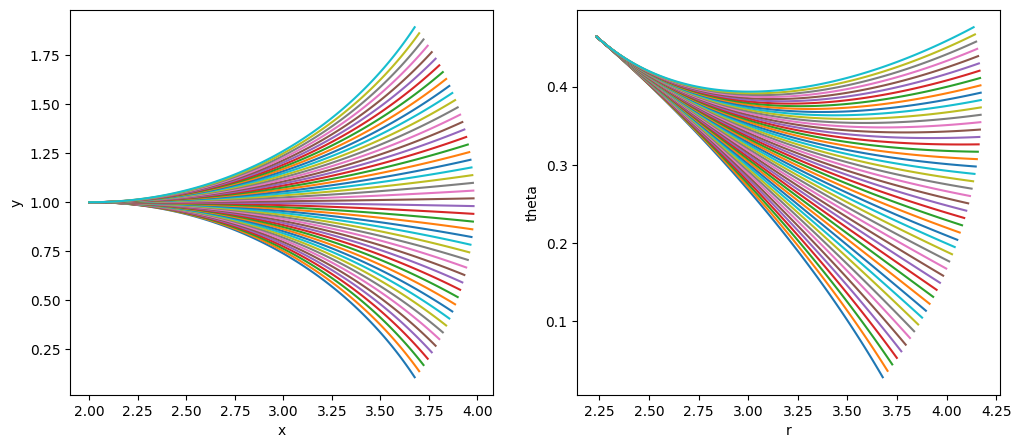

In [24]:
dt = 0.1
N = 100

# Generate a dubins trajectory
v = 0.2
w = 0.1

init_pose = np.array([2, 1, 0])

trajs = []
plt.figure()

fig, axs = plt.subplots(1, 2, figsize=(12,5))

for w in np.linspace(-0.1, 0.1, 50):
    u = np.array([v, w])
    traj = dubins_traj(init_pose, u, N, dt)
    axs[0].plot(traj[:,0], traj[:,1])

    traj_polar = np.zeros((N, 3))
    for i in range(N):
        traj_polar[i,0] = np.linalg.norm(traj[i,:2])
        traj_polar[i,1] = np.arctan2(traj[i,1], traj[i,0])
        traj_polar[i,2] = traj[i,2]
    axs[1].plot(traj_polar[:,0], traj_polar[:,1])

    trajs.append(traj)

# Label axes
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].set_xlabel('r')
axs[1].set_ylabel('theta')
plt.show()

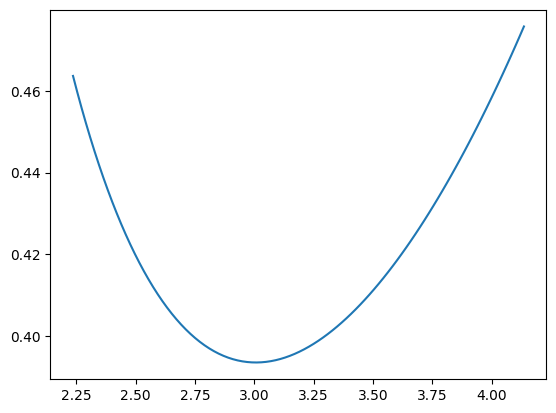

In [15]:
# Convert the trajectory to polar coordinates
traj_polar = np.zeros((N, 3))
for i in range(N):
    traj_polar[i,0] = np.linalg.norm(traj[i,:2])
    traj_polar[i,1] = np.arctan2(traj[i,1], traj[i,0])
    traj_polar[i,2] = traj[i,2]

# Plot the polar trajectory
plt.figure()
#plt.scatter(traj_polar[:,0], traj_polar[:,1], s=1)
plt.plot(traj_polar[:,0], traj_polar[:,1])
plt.show()